##### 1. Откройте датасет и проведите обработку данных

In [ ]:
import pandas as pd

data = pd.read_csv('train.csv').dropna()

X = data.drop(['PassengerId', 'Name', 'Transported'], axis=1)
y = data['Transported'].astype(int)

# Проведите обработку категориальных данных
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
encoded_cols = pd.get_dummies(X[categorical_cols]) # преобразует признаки по столбам 0 и 1

X = pd.concat([X.drop(categorical_cols, axis=1), encoded_cols], axis=1) # объединение датафреймов  и удаление категориальных признаков из Х

# Проведите нормализацию числовых данных
from sklearn.preprocessing import MinMaxScaler
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/1/P,Cabin_T/3/P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,False,True,...,False,False,False,False,False,False,False,True,True,False
1,0.303797,0.010988,0.000302,0.002040,0.024500,0.002164,True,False,False,True,...,False,False,False,False,False,False,False,True,True,False
2,0.734177,0.004335,0.119948,0.000000,0.299670,0.002410,False,True,False,True,...,False,False,False,False,False,False,False,True,False,True
3,0.417722,0.000000,0.043035,0.030278,0.148563,0.009491,False,True,False,True,...,False,False,False,False,False,False,False,True,True,False
4,0.202532,0.030544,0.002348,0.012324,0.025214,0.000098,True,False,False,True,...,False,False,False,False,False,False,False,True,True,False


##### 2. Постройте дерево решений. Вычислите метрики: accuracy, f1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

Accuracy: 0.7927382753403933
F1-score: 0.8002915451895044


F1-score — гармоническое среднее точности и полноты и рассчитывается по формуле:

F1=2∗Precision∗RecallPrecision+Recall, где Precision — точность, а Recall — полнота.

Точность показывает, насколько часто алгоритм правильно классифицирует положительные примеры, а полнота — насколько часто он находит все положительные примеры. F1-оценка объединяет эти два показателя и даёт сбалансированное представление о качестве алгор ма.

Значение F1-оценки может варьироваться от 0 до 1, где 1 означает идеальное качество, а 0 — полное отсутствие качества.

##### 3. Примените метод случайного леса. Вычислите значимость переменных.

In [ ]:
rdm = RandomForestClassifier(n_estimators=100, random_state=42)
rdm.fit(X_train, y_train)

importances = rdm.feature_importances_

feature_importances = pd.Series(importances, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print(feature_importances)

CryoSleep_False    0.070579
Spa                0.068398
RoomService        0.061587
Age                0.061056
VRDeck             0.060028
                     ...   
Cabin_F/1086/P     0.000000
Cabin_G/15/S       0.000000
Cabin_F/1087/S     0.000000
Cabin_F/1088/S     0.000000
Cabin_E/53/P       0.000000
Length: 5321, dtype: float64


Важность признаков — это мера, которая показывает, насколько сильно каждый признак влияет на результат модели машинного обучения. Признаки — это характеристики или атрибуты данных, которые используются для предсказания целевой переменной.

В моделях машинного обучения важность признаков может быть определена различными способами. Один из методов — использование значений важности (feature importances), которые представляют собой оценку вклада каждого признака в итоговую модель. Чем больше значение важности у признака, тем больше его вклад в модель и тем более значимым он считается для прогнозирования.

В контексте машинного обучения и, в частности, моделей случайного леса, вклад каждого признака в модель означает его важность или значимость для прогнозирования целевой переменной.

В случае с моделью случайного леса каждый признак представляет собой определённое свойство или характеристику данных. В процессе обучения модель анализирует эти признаки и определяет, какие из них наиболее полезны для точного предсказания целевой переменной. Эти полезные признаки считаются важными или имеющими больший вклад в модель.

Важность признаков измеряется различными способами, например, через значения важности (feature importances), которые представляют собой оценку вклада каждого признака в итоговую модель. Чем больше значение важности у признака, тем больше его вклад в модель и тем более значимым он считается для прогнозирования.

В контексте машинного обучения и моделей случайного леса, вклад каждого признака в модель не всегда напрямую связан с корреляцией.

Корреляция — это статистическая мера, которая показывает, насколько тесно связаны две переменные. Она может быть положительной (когда увеличение одной переменной связано с увеличением другой) или отрицательной (когда увеличение одной переменной связано с уменьшением другой).

В то время как важность признаков в моделях случайного леса определяется их способностью улучшать предсказательную силу модели, корреляция между признаками может влиять на интерпретацию важности признаков. Например, если два признака сильно коррелируют друг с другом, то один из них может иметь низкую важность, так как модель может использовать другой признак для прогнозирования целевой переменной. Однако корреляция не является единственным фактором, определяющим важность признаков.

##### 4.1 Визуализируйте зависимость качества решения от числа деревьев для случайного леса.

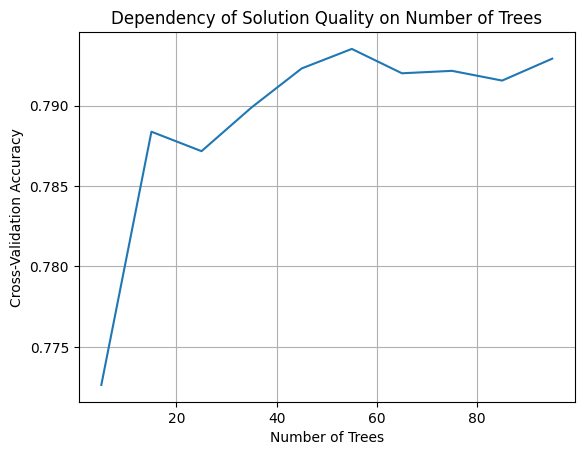

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
n_estimators_range = np.arange(5, 100, 10)  # Лучший результат - 55 деревьев
cv_scores = []
for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
plt.plot(n_estimators_range, cv_scores)
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Dependency of Solution Quality on Number of Trees')
plt.grid(True)
plt.show()

**cross_val_score** — это метод из библиотеки **scikit-learn**, который используется для оценки производительности модели машинного обучения с помощью перекрёстной проверки (кросс-валидации).

Этот метод разделяет данные на обучающую и тестовую выборки, обучает модель на обучающей выборке и оценивает её производительность на тестовой выборке. Затем процесс повторяется несколько раз, чтобы получить более надёжную оценку производительности модели.

В результате **cross_val_score** возвращает массив оценок производительности модели для каждого разделения данных. Эти оценки можно использовать для сравнения разных моделей или настройки гиперпараметров модели.


##### 4.2 Постройте несколько зависимостей качества решения от числа деревьев для разной глубины дерева.

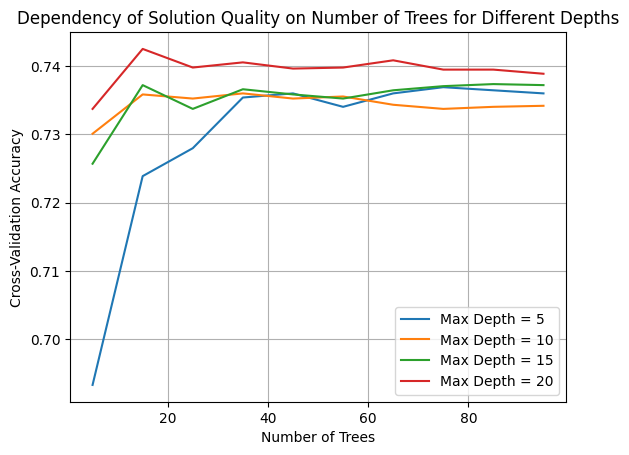

In [ ]:
n_estimators_range = np.arange(5, 100, 10)  # From 10 to 200 trees with step 10
max_depth_values = [5, 10, 15, 20]  # Different tree depths to consider
for max_depth in max_depth_values:
    cv_scores = []
    for n_estimators in n_estimators_range:
        rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())

    plt.plot(n_estimators_range, cv_scores, label=f'Max Depth = {max_depth}')

plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Dependency of Solution Quality on Number of Trees for Different Depths')
plt.legend()
plt.grid(True)
plt.show()

##### 5. Выполните пункт 4.2 для градиентого бустинга.

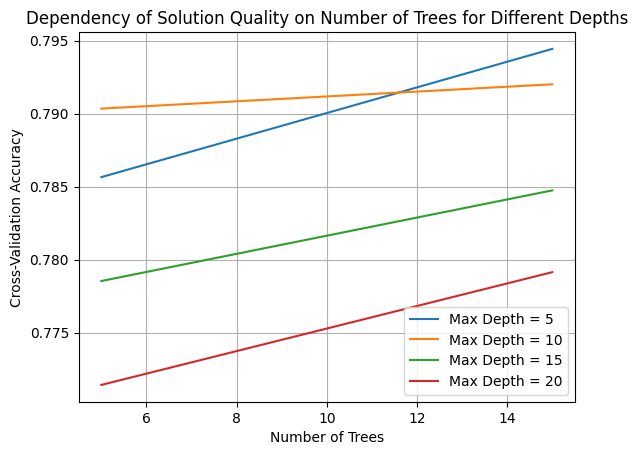

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
n_estimators_range = np.arange(5, 25, 10)
max_depth_values = [5, 10, 15, 20]
for max_depth in max_depth_values:
    cv_scores = []
    for n_estimators in n_estimators_range:
        rf_classifier = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())

    plt.plot(n_estimators_range, cv_scores, label=f'Max Depth = {max_depth}')

plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Dependency of Solution Quality on Number of Trees for Different Depths')
plt.legend()
plt.grid(True)
plt.show()